In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTENC
import shap


In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.dropna(subset=['Credit_Score'], inplace=True)


In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)


Checking the unique values in each column

In [10]:
df.nunique()

,0
ID,53049
Customer_ID,11071
Month,8
Name,9168
Age,1057
SSN,11064
Occupation,16
Annual_Income,14707
Monthly_Inhand_Salary,11628
Num_Bank_Accounts,570


Target Distribution

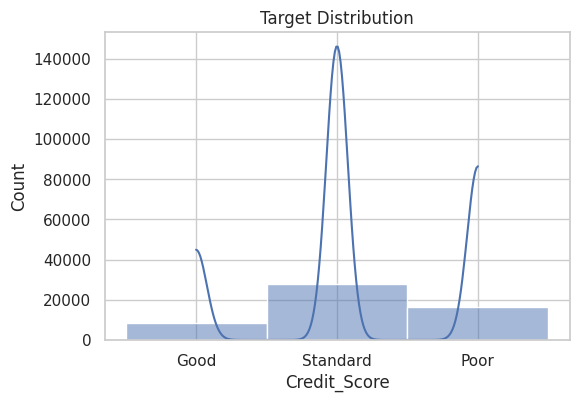

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["Credit_Score"], kde=True)
plt.title("Target Distribution")
plt.show()

In [12]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [13]:
df.head(), df.columns.tolist()

(        ID Customer_ID     Month             Name  Age          SSN  \
 0   0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
 6   0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
 8   0x160e  CUS_0x21b1   January  Rick Rothackerj  28_  004-07-5839   
 9   0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
 10  0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
 
    Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0   Scientist      19114.12            1824.843333                  3   
 6   Scientist      19114.12            1824.843333                  3   
 8     _______      34847.84            3037.986667                  2   
 9     Teacher      34847.84            3037.986667                  2   
 10    Teacher     34847.84_            3037.986667                  2   
 
     Num_Credit_Card  Interest_Rate Num_of_Loan  \
 0                 4              3           4   
 6                

Correlations

<Axes: >

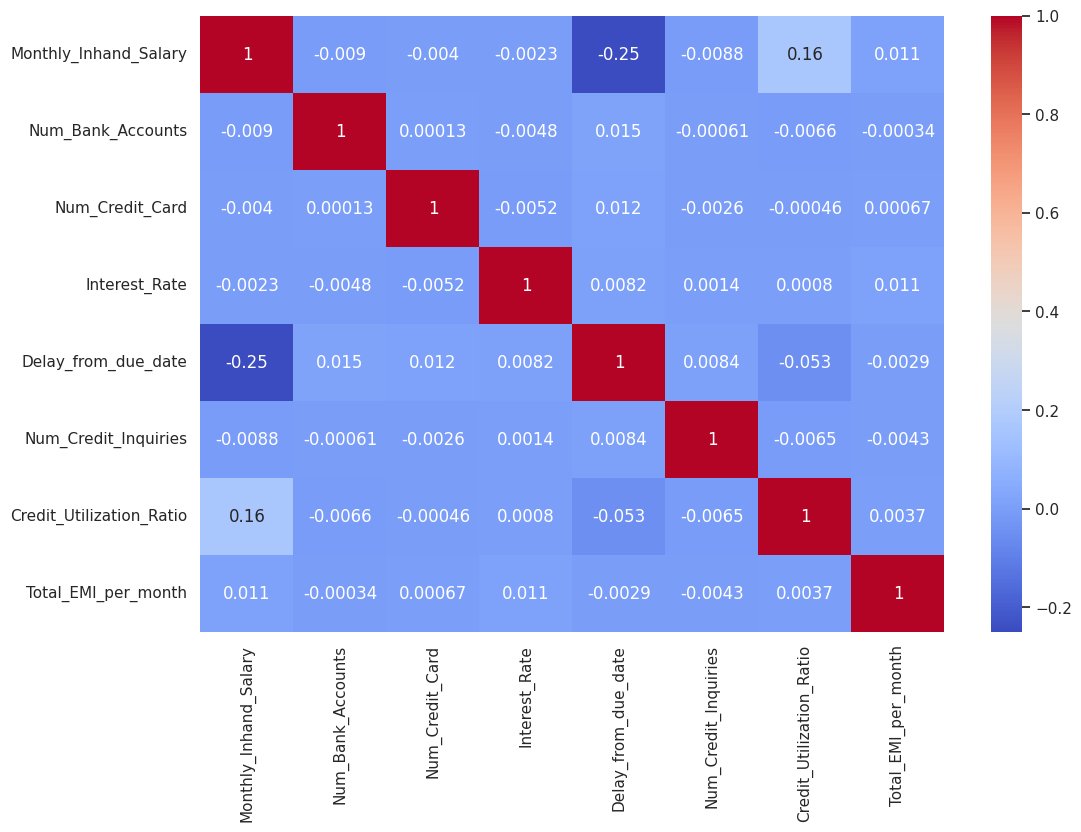

In [14]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Preprocessing**

In [15]:
print(df.columns.tolist())

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [16]:
df.fillna(df.mean(numeric_only=True), inplace=True)

Label Encoding for 'Payment_Behaviour'

In [17]:
df['Payment_Behaviour'] = LabelEncoder().fit_transform(df['Payment_Behaviour'])
df = pd.get_dummies(df, columns=['Payment_Behaviour'])


In [18]:
numeric_cols = ['Age', 'Annual_Income', 'Outstanding_Debt']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True), errors='coerce')



delete rows with missing target values

In [19]:
# df = df.dropna(subset=['Credit_Score'])

# Define features


Convert 'Credit_Score' to numeric, handling errors


In [20]:
# df['Credit_Score'] = pd.to_numeric(df['Credit_Score'], errors='coerce')
# df = df.dropna(subset=['Credit_Score'])


In [21]:
# df = df.dropna(subset=['Credit_Score'])
# df = df.fillna(df.mean())


In [22]:
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

Train-test split


In [23]:
print(X.shape)
print(y.shape)

(53049, 33)
(53049,)


In [24]:
print(df['Credit_Score'].isnull().sum())
# Check for missing values  (X)
print(X.isnull().sum())


0
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Payment_Behaviour_0         0
Payment_Behaviour_1         0
Payment_Behaviour_2         0
Payment_Behaviour_3         0
Payment_Behaviour_4         0
Payment_Behaviour_5         0
Payment_Behaviour_6         0
dtype: i

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Exploratory Data Analysis(EDA

Target distribution

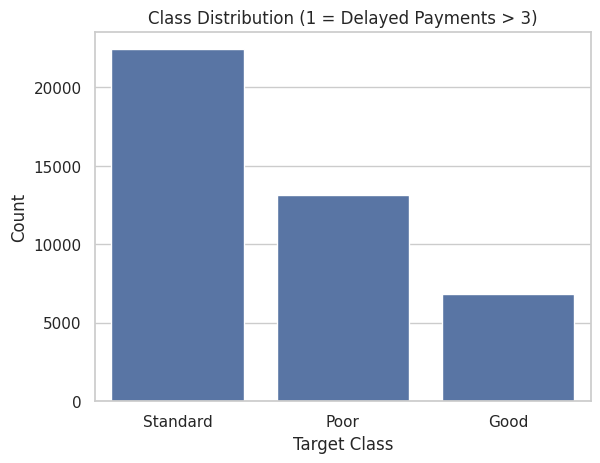

In [26]:
sns.countplot(x=y_train)
plt.title("Class Distribution (1 = Delayed Payments > 3)")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()


Distribution of Numeric Features

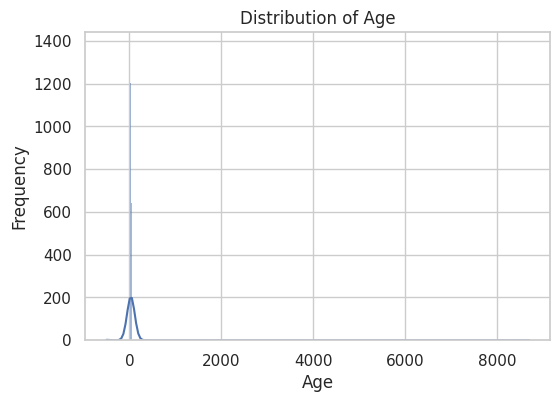

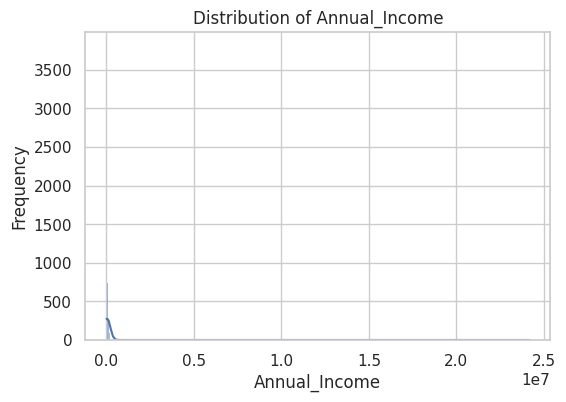

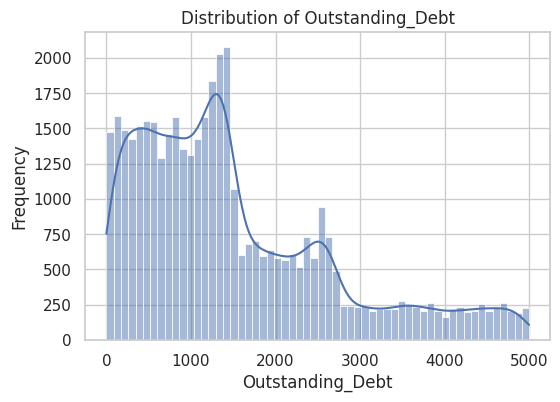

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Correlation Heatmap


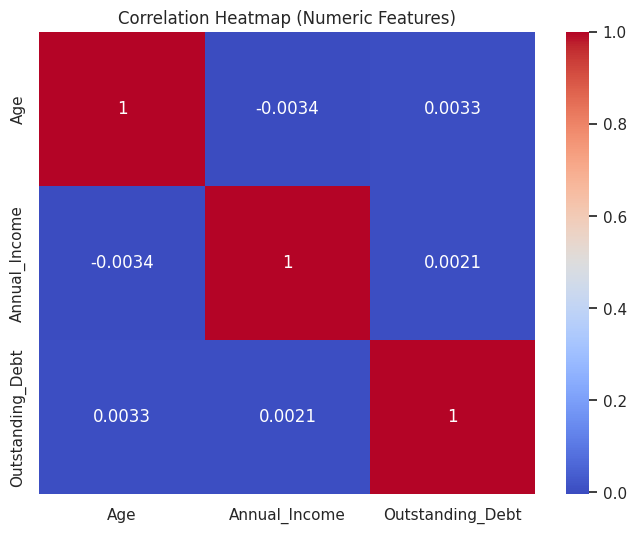

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(X_train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

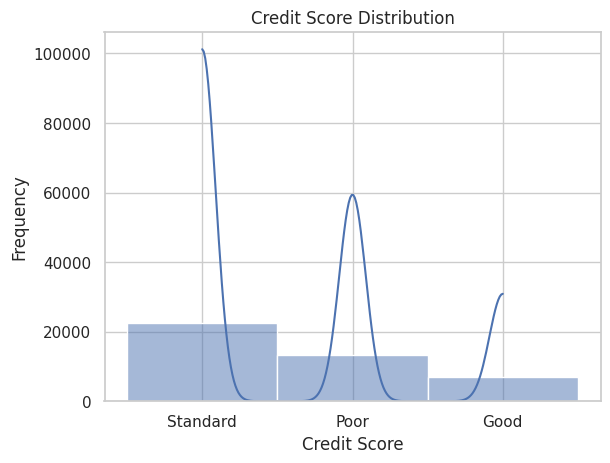

In [29]:
# Target distribution in training set
sns.histplot(y_train, kde=True)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()


Boxplots by Target Class (this is to explore relationship with risk)



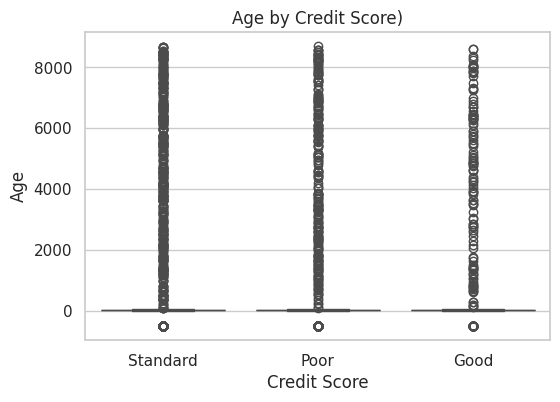

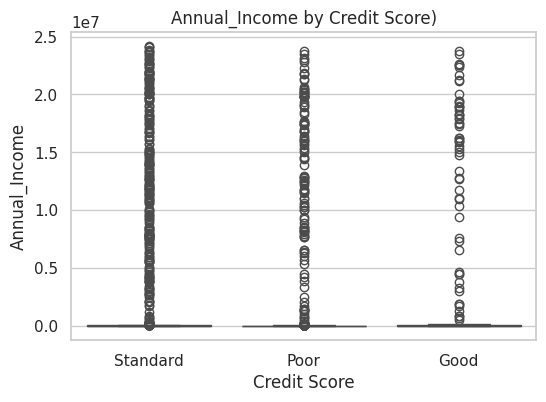

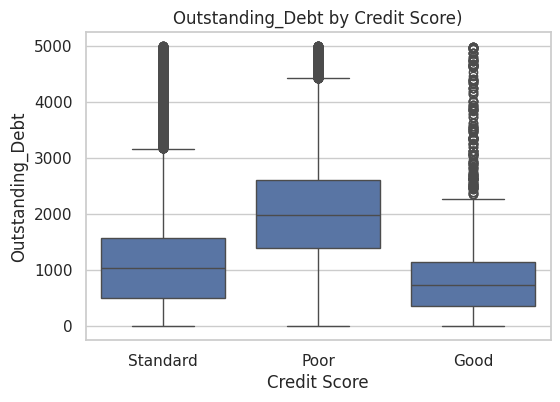

In [30]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"{col} by Credit Score)")
    plt.xlabel("Credit Score")
    plt.ylabel(col)
    plt.show()


#Feature Engineering & Fuzzy AHP



Fuzzy AHP weights

In [31]:
fuzzy_weights = {
    'Age': 0.1,
    'Annual_Income': 0.3,
    'Outstanding_Debt': 0.6
}

In [32]:
# FOR weights TO CHHOSE FEATURE
X_train_weighted = X_train[numeric_cols] * pd.Series(fuzzy_weights)
X_test_weighted = X_test[numeric_cols] * pd.Series(fuzzy_weights)

In [33]:
# ADDING ENGINEERED features
X_train_weighted['Debt_to_Income'] = X_train['Outstanding_Debt'] / (X_train['Annual_Income'] + 1e-6)
X_test_weighted['Debt_to_Income'] = X_test['Outstanding_Debt'] / (X_test['Annual_Income'] + 1e-6)


#SMOTE


In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_weighted, y_train)

 #Model Building (random forest )




In [35]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [36]:
# elPredict
y_pred_rf = rf_model.predict(X_test_weighted)

# Evaluation

In [37]:
print("Random Forest Classification:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification:
               precision    recall  f1-score   support

        Good       0.70      0.76      0.73      1736
        Poor       0.78      0.81      0.79      3351
    Standard       0.80      0.76      0.78      5523

    accuracy                           0.78     10610
   macro avg       0.76      0.78      0.77     10610
weighted avg       0.78      0.78      0.78     10610



Feature Importance Visualization

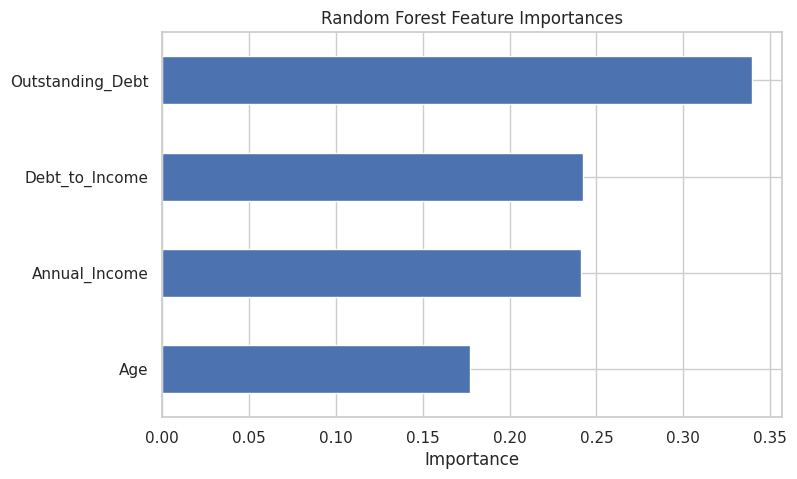

In [38]:
importances = pd.Series(rf_model.feature_importances_, index=X_train_weighted.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5), title="Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


# SHAP


In [39]:
!pip install shap


In [41]:
# SHAP
X_test_numeric = X_test.select_dtypes(include=np.number).fillna(0)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_numeric)

In [82]:
# shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [83]:
# shap.dependence_plot("Age", shap_values[1], X_test)


In [84]:
# # SHAP Waterfall Plot for predict
# shap.initjs()
# shap.waterfall_plot(shap_values[1][0])

Retrain Random Forest on balanced dataset


In [ ]:
# rf_model.fit(X_train_balanced, y_train_balanced)

In [ ]:
# y_pred_balanced = rf_model.predict(X_test_weighted)
# print("Balanced Regression Report:\n")
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred_balanced))
# print("R-squared:", r2_score(y_test, y_pred_balanced))


AdaBoost with a decision tree base estimator


In [46]:
!pip install scikit-learn --upgrade

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_model.fit(X_train_balanced, y_train_balanced)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [49]:
y_pred_ada = ada_model.predict(X_test_weighted)
print("AdaBoost Classification:\n", classification_report(y_test, y_pred_ada))



AdaBoost Classification:
               precision    recall  f1-score   support

        Good       0.28      0.81      0.42      1736
        Poor       0.61      0.72      0.66      3351
    Standard       0.61      0.18      0.28      5523

    accuracy                           0.45     10610
   macro avg       0.50      0.57      0.45     10610
weighted avg       0.56      0.45      0.42     10610



 XGBoost (Extreme Gradient Boosting)

In [50]:
from xgboost import XGBClassifier

In [51]:
from sklearn.preprocessing import LabelEncoder


In [52]:
le = LabelEncoder()
y_train_balanced = le.fit_transform(y_train_balanced)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [53]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
y_pred_xgb = xgb_model.predict(X_test_weighted)
print("XGBoost Classification:\n", classification_report(y_test, y_pred_xgb))



XGBoost Classification:
               precision    recall  f1-score   support

           0       0.45      0.68      0.54      1736
           1       0.66      0.77      0.71      3351
           2       0.76      0.56      0.65      5523

    accuracy                           0.65     10610
   macro avg       0.62      0.67      0.63     10610
weighted avg       0.68      0.65      0.65     10610



Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier


In [56]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(random_state=42)

In [57]:
y_pred_dt = dt_model.predict(X_test_weighted)
print("Decision Tree Classification:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classification:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      1736
           1       0.76      0.83      0.79      3351
           2       0.82      0.73      0.77      5523

    accuracy                           0.77     10610
   macro avg       0.75      0.78      0.76     10610
weighted avg       0.78      0.77      0.77     10610



Extra Trees Classifier (Extremely Randomized Trees)


In [58]:
from sklearn.ensemble import ExtraTreesClassifier

In [59]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train_balanced, y_train_balanced)

ExtraTreesClassifier(random_state=42)

In [60]:
y_pred_et = et_model.predict(X_test_weighted)
print("Extra Trees Classification:\n", classification_report(y_test, y_pred_et))



Extra Trees Classification:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      1736
           1       0.77      0.84      0.80      3351
           2       0.82      0.74      0.78      5523

    accuracy                           0.78     10610
   macro avg       0.76      0.79      0.78     10610
weighted avg       0.79      0.78      0.78     10610



k-Nearest Neighbors (k-NN)


In [61]:
from sklearn.neighbors import KNeighborsClassifier


In [62]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_balanced, y_train_balanced)


KNeighborsClassifier()

In [63]:
y_pred_knn = knn_model.predict(X_test_weighted)
print("k-NN Classification:\n", classification_report(y_test, y_pred_knn))


k-NN Classification:
               precision    recall  f1-score   support

           0       0.58      0.81      0.68      1736
           1       0.72      0.82      0.77      3351
           2       0.82      0.65      0.72      5523

    accuracy                           0.73     10610
   macro avg       0.71      0.76      0.72     10610
weighted avg       0.75      0.73      0.73     10610



Multilayer Perceptron (MLP) Neural Network


In [64]:
from sklearn.neural_network import MLPClassifier


In [65]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_model.fit(X_train_balanced, y_train_balanced)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

In [66]:
y_pred_mlp = mlp_model.predict(X_test_weighted)
print("MLP Classification:\n", classification_report(y_test, y_pred_mlp))



MLP Classification:
               precision    recall  f1-score   support

           0       0.23      0.88      0.37      1736
           1       0.57      0.31      0.41      3351
           2       0.46      0.18      0.26      5523

    accuracy                           0.34     10610
   macro avg       0.42      0.46      0.35     10610
weighted avg       0.46      0.34      0.33     10610



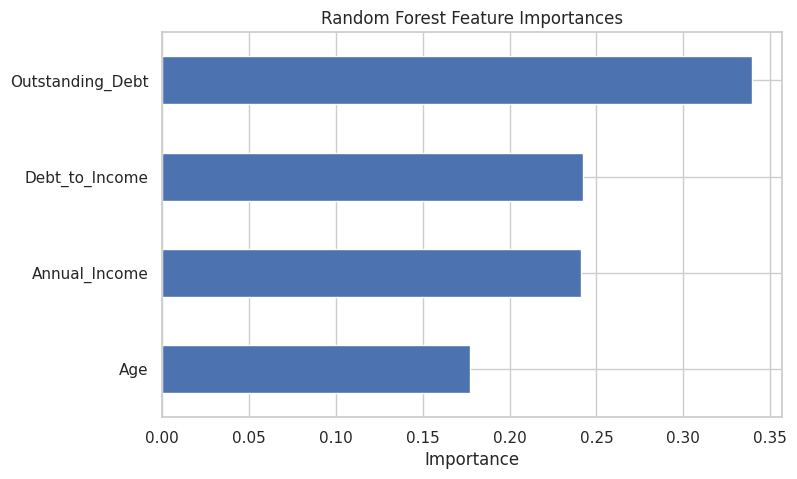

In [67]:
importances = pd.Series(rf_model.feature_importances_, index=X_train_weighted.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5), title="Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


visualize the F1-scores of all models

In [68]:
models = [
    ('Random Forest', rf_model),
    ('AdaBoost', ada_model),
    ('XGBoost', xgb_model),
    ('Decision Tree', dt_model),
    ('Extra Trees', et_model),
    ('k-NN', knn_model),
    ('MLP', mlp_model)
]


In [69]:
f1_scores = []
model_names = []

In [70]:
for name, model in models:
    X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
    X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train_numeric)
    X_test_imputed = imputer.transform(X_test_numeric)

    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    report = classification_report(y_test, y_pred, output_dict=True)

    f1_scores.append(report['weighted avg']['f1-score'])
    model_names.append(name)

Random Forest: 0.7662994443085449
AdaBoost: 0.6192441159837321
XGBoost: 0.7313837811528479
Decision Tree: 0.6721312697980272
Extra Trees: 0.6950589551564005
k-NN: 0.6577959475583115
MLP: 0.45838273649505257


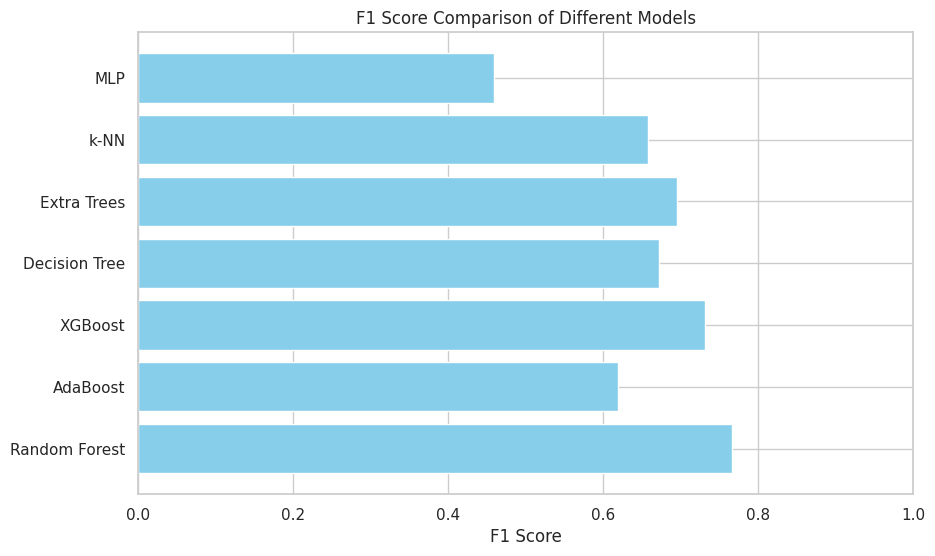

In [71]:
for model_name, f1_score in zip(model_names, f1_scores):
    print(f"{model_name}: {f1_score}")
plt.figure(figsize=(10, 6))
plt.barh(model_names, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.xlim(0, 1)
plt.show()


In [79]:
for name, model in models:
    # Convert to numeric, handling errors
    X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
    X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')

    # Impute missing values (NaNs introduced by 'coerce')
    imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
    X_train_imputed = imputer.fit_transform(X_train_numeric)
    X_test_imputed = imputer.transform(X_test_numeric)

    model.fit(X_train_imputed, y_train)  # Use imputed data for training
    y_pred = model.predict(X_test_imputed)  # Use imputed data for prediction
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))




Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68      1736
           1       0.79      0.77      0.78      3351
           2       0.77      0.81      0.79      5523

    accuracy                           0.77     10610
   macro avg       0.76      0.74      0.75     10610
weighted avg       0.77      0.77      0.77     10610


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.24      0.36      1736
           1       0.64      0.64      0.64      3351
           2       0.63      0.76      0.69      5523

    accuracy                           0.64     10610
   macro avg       0.66      0.55      0.56     10610
weighted avg       0.64      0.64      0.62     10610


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62      1736
           1       0.77

In [85]:
# for name, model in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

#     # SHAP Explanation
#     if hasattr(model, 'feature_importances_'):
#         explainer = shap.TreeExplainer(model) if name in ['Random Forest', 'AdaBoost', 'XGBoost', 'Extra Trees', 'Decision Tree'] else shap.KernelExplainer(model.predict, X_train)
#         shap_values = explainer.shap_values(X_test)
#         print(f"\n{name} - SHAP Summary Plot:")
#         shap.summary_plot(shap_values[1], X_test, plot_type="bar")
#         print(f"\n{name} - SHAP Waterfall Plot (first instance):")
#         shap.waterfall_plot(shap_values[1][0])
#         print(f"\n{name} - SHAP Dependence Plot for 'Age':")
#         shap.dependence_plot("Age", shap_values[1], X_test)
#     else:
#         print(f"\n{name} does not support SHAP explanations directly due to missing feature importance data.")

#     print("\n" + "-"*50 + "\n")

LIME

In [75]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=23bbf7ce9ccaa1235b9528ba744f7c6e546e28f42044e613944b8a9606349cf8
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Convert X_train and X_test to numeric before fitting and explaining


In [78]:
from lime.lime_tabular import LimeTabularExplainer
lime_model = RandomForestClassifier(random_state=42)

X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

lime_model.fit(X_train_numeric, y_train)
class_names = np.unique(y_train).astype(str)

explainer = LimeTabularExplainer(
    training_data=np.array(X_train_numeric),
    feature_names=X_train_numeric.columns,
    class_names=class_names,
    mode='classification'
)

idx = 10
exp = explainer.explain_instance(
    data_row=X_test_numeric.iloc[idx].astype(float),
    predict_fn=lime_model.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True, show_all=False)

print(f"Explanation for prediction of instance {idx}:")
print(exp.as_list())

Explanation for prediction of instance 10:
[('604.77 < Outstanding_Debt <= 1240.49', -0.11848989451773483), ('Delay_from_due_date <= 10.00', -0.05687319228580749), ('8.00 < Interest_Rate <= 15.00', -0.05524541009874729), ('Num_Bank_Accounts <= 4.00', 0.03426854072616581), ('Num_Credit_Card <= 4.00', -0.03315117339093517), ('Num_Credit_Inquiries <= 3.00', -0.03248593109328409), ('Annual_Income > 69933.98', -0.009126946821590709), ('Total_EMI_per_month > 169.06', 0.003104339340290958), ('Credit_Utilization_Ratio > 36.45', -0.001954644541423183), ('Monthly_Inhand_Salary > 5715.35', 0.0013582700503315223)]


#referance
my paper:https://www.mdpi.com/2227-9091/
https://link.springer.com/chapter/10.1007/978-3-031-48465-0_2